In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
#visualization
import seaborn as sns 
import metaplot as plot
import matplotlib.pyplot as plt


In [52]:
#Data Preparation: Generate or load your dataset.

data = pd.read_csv("../bike-sharing-daily/bike-sharing-daily.csv")

data.head()





,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [53]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.577500,0.154846,439,2290,2729


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 85.8+ KB


In [55]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,1182,1341
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,1432,1796


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [56]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


In [57]:
data = data.drop(labels =['casual','registered','instant'],axis=1)

In [58]:
data


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,12/28/2012,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,12/29/2012,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,12/30/2012,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [59]:
#converte a coluna string dteday para  o tipo date
data.dteday = data.dteday =pd.to_datetime(data.dteday, format ='%m/%d/%Y')

In [60]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [66]:
#ajustar a data como index

data.index = pd.DatetimeIndex(data.dteday)

In [67]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,,
2011-01-01,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


In [68]:
data = data.drop(labels=['dteday'],axis=1)

In [69]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
2012-12-28,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
2012-12-29,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341


Text(0, 0.5, 'Bike rental')

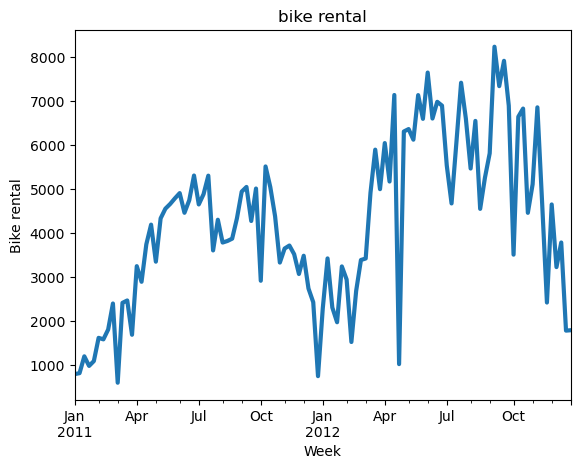

In [71]:
data['cnt'].asfreq('w').plot(linewidth = 3)
plt.title('bike rental')
plt.xlabel('Week')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

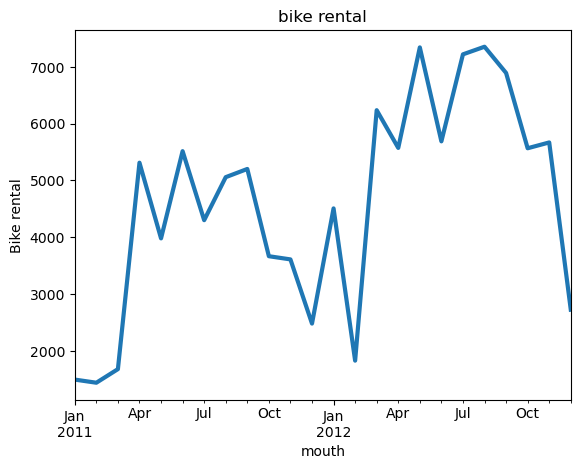

In [74]:
data['cnt'].asfreq('M').plot(linewidth = 3)
plt.title('bike rental')
plt.xlabel('mouth')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

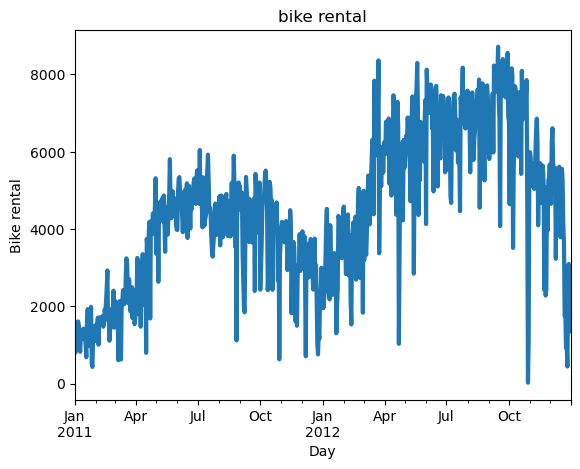

In [75]:
data['cnt'].asfreq('d').plot(linewidth = 3)
plt.title('bike rental')
plt.xlabel('Day')
plt.ylabel('Bike rental')

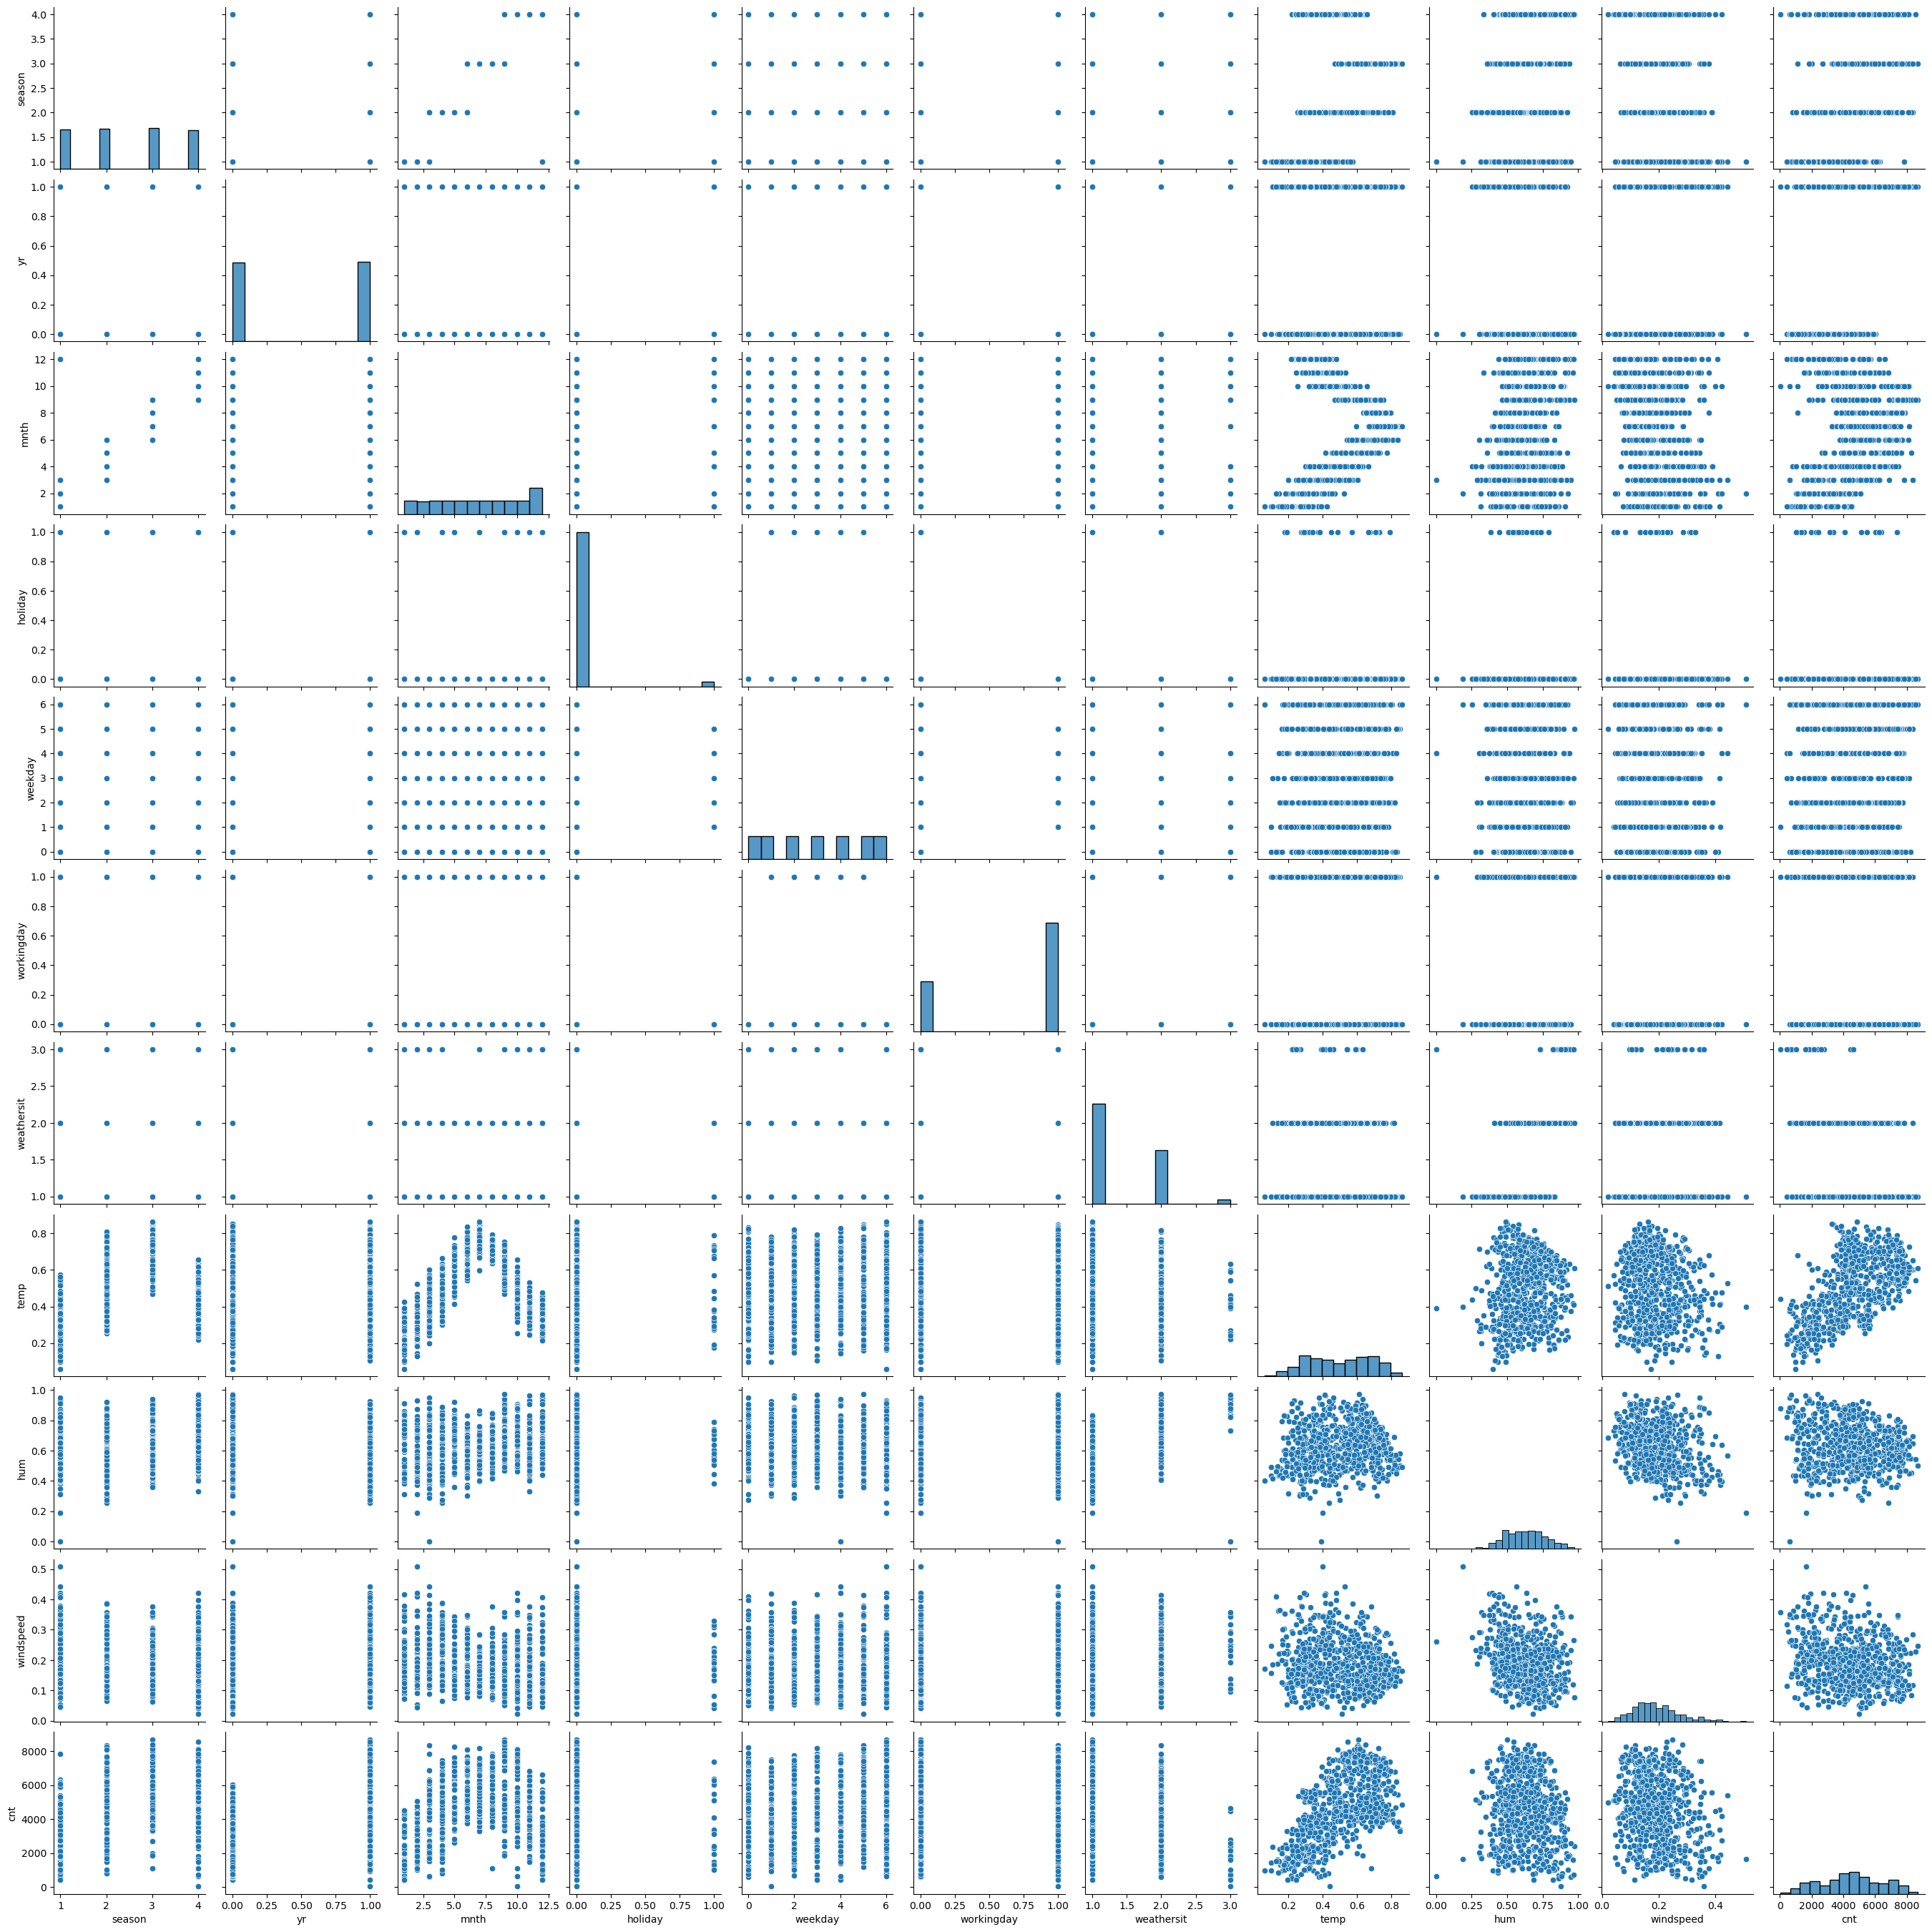

In [82]:
sns.pairplot(data);

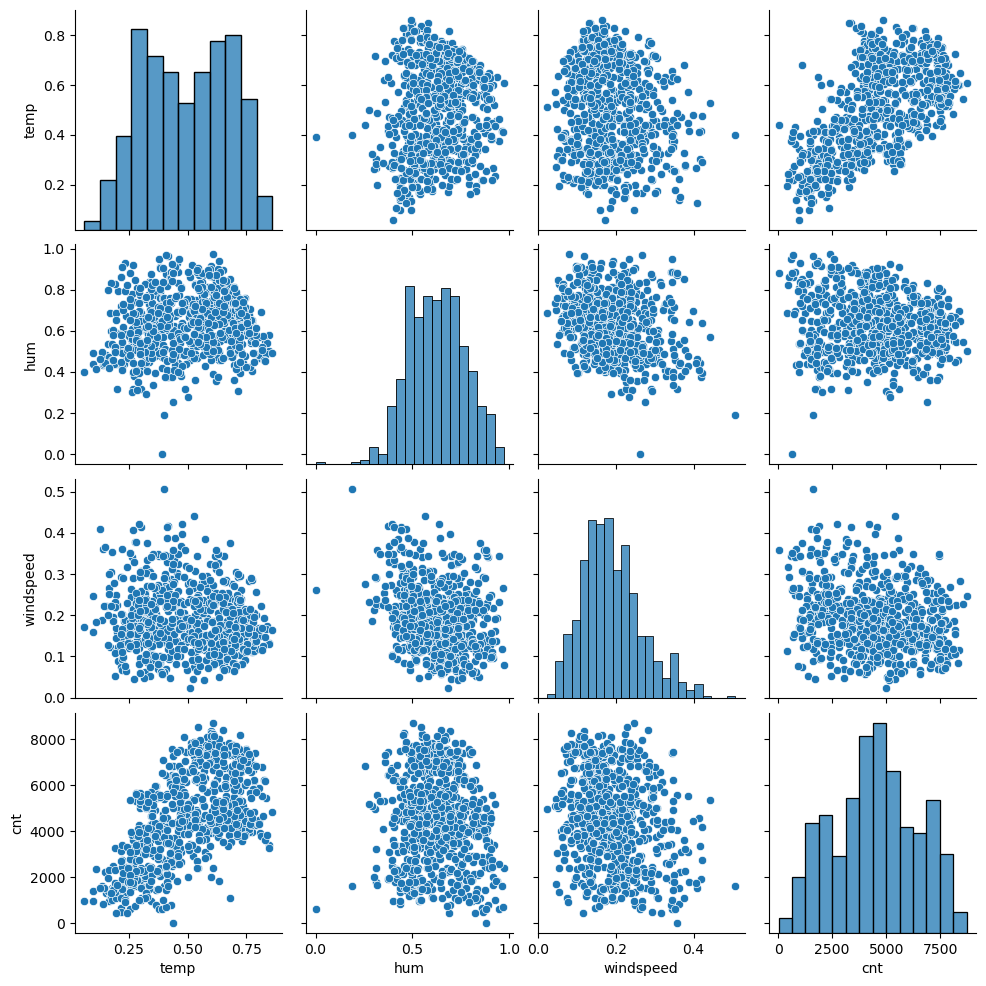

In [83]:
#correlação

xnumerial =  data[['temp','hum','windspeed','cnt']]


sns.pairplot(xnumerial)

<AxesSubplot: >

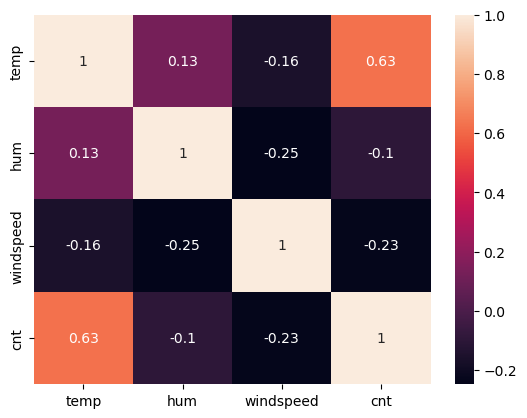

In [85]:
sns.heatmap(xnumerial.corr(), annot= True)

In [88]:
xCat = data[['season' ,'yr','mnth','holiday','weekday','workingday','weathersit']]

xCat


,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1
...,...,...,...,...,...,...,...
2012-12-27,1,1,12,0,4,1,2
2012-12-28,1,1,12,0,5,1,2
2012-12-29,1,1,12,0,6,0,2


In [92]:
from sklearn.preprocessing import OneHotEncoder
oneHotEncoder = OneHotEncoder()


xCat = oneHotEncoder.fit_transform(xCat).toarray()


In [93]:
xCat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [96]:
xCat.shape

(731, 32)

In [97]:
xCat = pd.DataFrame(xCat)

In [98]:
xCat

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [99]:
xnumerial = xnumerial.reset_index()

In [100]:
xnumerial

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...
726,2012-12-27,0.254167,0.652917,0.350133,2114
727,2012-12-28,0.253333,0.590000,0.155471,3095
728,2012-12-29,0.253333,0.752917,0.124383,1341
729,2012-12-30,0.255833,0.483333,0.350754,1796


In [101]:
xAll = pd.concat([xCat, xnumerial] , axis=1 )

In [102]:
xAll

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-27,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2012-12-28,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2012-12-29,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2012-12-30,0.255833,0.483333,0.350754,1796


In [103]:
xAll = xAll.drop(labels=['dteday'], axis=1)

In [104]:
xAll

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.254167,0.652917,0.350133,2114
727,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.253333,0.590000,0.155471,3095
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.253333,0.752917,0.124383,1341
729,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.255833,0.483333,0.350754,1796


In [105]:
#x recebe todos os registros menos o útimo cnt
x = xAll.iloc[:,:-1].values

In [106]:
#y recebe somente o último registro cnt
y = xAll.iloc[:,-1:].values

In [107]:
y

array([[ 985],
       [ 801],
       [1349],
       [1562],
       [1600],
       [1606],
       [1510],
       [ 959],
       [ 822],
       [1321],
       [1263],
       [1162],
       [1406],
       [1421],
       [1248],
       [1204],
       [1000],
       [ 683],
       [1650],
       [1927],
       [1543],
       [ 981],
       [ 986],
       [1416],
       [1985],
       [ 506],
       [ 431],
       [1167],
       [1098],
       [1096],
       [1501],
       [1360],
       [1526],
       [1550],
       [1708],
       [1005],
       [1623],
       [1712],
       [1530],
       [1605],
       [1538],
       [1746],
       [1472],
       [1589],
       [1913],
       [1815],
       [2115],
       [2475],
       [2927],
       [1635],
       [1812],
       [1107],
       [1450],
       [1917],
       [1807],
       [1461],
       [1969],
       [2402],
       [1446],
       [1851],
       [2134],
       [1685],
       [1944],
       [2077],
       [ 605],
       [1872],
       [21

In [108]:
x

array([[1.      , 0.      , 0.      , ..., 0.344167, 0.805833, 0.160446],
       [1.      , 0.      , 0.      , ..., 0.363478, 0.696087, 0.248539],
       [1.      , 0.      , 0.      , ..., 0.196364, 0.437273, 0.248309],
       ...,
       [1.      , 0.      , 0.      , ..., 0.253333, 0.752917, 0.124383],
       [1.      , 0.      , 0.      , ..., 0.255833, 0.483333, 0.350754],
       [1.      , 0.      , 0.      , ..., 0.215833, 0.5775  , 0.154846]])

In [109]:
x.shape

(731, 35)

In [110]:
y.shape

(731, 1)

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y = scaler.fit_transform(y)


In [115]:
y

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777],
       [0.14277497],
       [0.13115509],
       [0.15922688],
       [0.1609526 ],
       [0.14104924],
       [0.13598711],
       [0.11251726],
       [0.07604694],
       [0.18729867],
       [0.21916705],
       [0.1749885 ],
       [0.11033134],
       [0.11090658],
       [0.16037736],
       [0.22583985],
       [0.05568339],
       [0.04705476],
       [0.13173033],
       [0.12379199],
       [0.1235619 ],
       [0.17015647],
       [0.15393465],
       [0.17303267],
       [0.17579383],
       [0.19397147],
       [0.1130925 ],
       [0.18419236],
       [0.19443166],
       [0.17349287],
       [0.18212149],
       [0.17441325],
       [0.1983433 ],
       [0.16682006],
       [0.18028072],
       [0.21755637],
       [0.20628164],
       [0.24079613],
       [0.282

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
#Model Definition: Define the architecture of your neural network.
#Compilation: Choose an optimizer, loss function, and metrics.

#% DA BASE PARA TESTE E 80% PARA TREINAMENTO 
xTrain, xTest , yTrain, yTest = train_test_split(x,y , test_size=0.2)

In [124]:
model = tf.keras.models.Sequential()
#activation function relu is a rectified linear units
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(35,)))
model.add(tf.keras.layers.Dense(units=100 , activation='relu'))
model.add(tf.keras.layers.Dense(units=100 , activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [125]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,901 (93.36 KB)

 Trainable params: 23,901 (93.36 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [129]:
#otimização: batch registra a cada 50 dados é realizado calculo dos erros e atualiza os peso de entrada
#realiza esse processo até passar por todos registros 
#validation_split 20% dos registros sera utlizado para validação
numberTrainning = model.fit(xTrain , yTrain , epochs=25 , batch_size=50 , validation_split=0.2)

Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.4486 - val_loss: 0.0729
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0709 - val_loss: 0.0283
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273 - val_loss: 0.0258
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - val_loss: 0.0142
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 - val_loss: 0.0151
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - val_loss: 0.0117
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0110 - val_loss: 0.0118
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - val_loss: 0.0119
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0076 - val_loss: 0.0115
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0069 - val_loss: 0.0116
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0115
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_l

In [133]:
numberTrainning.history.keys()

dict_keys(['loss', 'val_loss'])

dict_keys(['loss', 'val_loss'])

In [134]:
treinamentoHistorico =model.fit(xTrain , yTrain , epochs=1000)


Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0034
Epoch 9/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.0042
Epoch 10/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 
Epoch 11/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 
Epoch 12/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 
Epoch 13/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.0031
Epoch 14/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 
Epoch 15/1000
19/19 ━━━━━━━━━━━━━━━━━━━━

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 
Epoch 81/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 
Epoch 82/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 
Epoch 83/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Epoch 84/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
Epoch 85/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.0014   
Epoch 86/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 
Epoch 87/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0024
Epoch 88/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 
Epoch 89/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 
Epoch 90/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 
Epoch 91/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.0019
Epoch 92/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.0015
Epoch 93/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0036
Epoch 94/1000
19/19 ━━━━━━━━━━━━━━━━━━━━

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7108e-04 
Epoch 158/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0987e-04 
Epoch 159/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 6.4524e-04
Epoch 160/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 6.8614e-04
Epoch 161/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7556e-04 
Epoch 162/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 7.6123e-04
Epoch 163/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0012   
Epoch 164/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0013   
Epoch 165/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0011
Epoch 166/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3045e-04 
Epoch 167/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 7.2800e-04
Epoch 168/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 8.9309e-04
Epoch 169/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.8387e-04 
Epoch 170/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 5.1308e-04
Epoch 233/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9256e-04 
Epoch 234/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8379e-04 
Epoch 235/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0010
Epoch 236/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.6751e-04 
Epoch 237/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 7.9933e-04
Epoch 238/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 6.0689e-04
Epoch 239/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7862e-04 
Epoch 240/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 3.5895e-04
Epoch 241/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0587e-04 
Epoch 242/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0013
Epoch 243/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0012
Epoch 244/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3693e-04
Epoch 245/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9177e-04 
Epoch 309/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9320e-04 
Epoch 310/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.3788e-04 
Epoch 311/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 3.3377e-04
Epoch 312/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 3.9051e-04
Epoch 313/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6893e-04 
Epoch 314/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 3.0959e-04
Epoch 315/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0811e-04 
Epoch 316/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 2.4448e-04
Epoch 317/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.7670e-04 
Epoch 318/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4937e-04 
Epoch 319/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4580e-04 
Epoch 320/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3274e-04 
Epoch 321/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.7046e-04
Epoch 384/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0547e-04 
Epoch 385/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 3.5064e-04
Epoch 386/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 2.4164e-04
Epoch 387/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7952e-04 
Epoch 388/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4467e-04 
Epoch 389/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2141e-04 
Epoch 390/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2111e-04 
Epoch 391/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5891e-04 
Epoch 392/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5095e-04 
Epoch 393/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0154e-04 
Epoch 394/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.1169e-04 
Epoch 395/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2296e-04 
Epoch 396/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/s

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 4.9658e-04
Epoch 459/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8435e-04 
Epoch 460/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 3.9173e-04
Epoch 461/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 3.9693e-04
Epoch 462/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.6220e-04 
Epoch 463/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 2.6060e-04
Epoch 464/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3352e-04 
Epoch 465/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 3.1302e-04
Epoch 466/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 3.6197e-04
Epoch 467/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3317e-04 
Epoch 468/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6476e-04 
Epoch 469/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8300e-04 
Epoch 470/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9446e-04 
Epoch 471/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 2.2423e-04
Epoch 534/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 3.6802e-04
Epoch 535/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3149e-04 
Epoch 536/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0024   
Epoch 537/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 
Epoch 538/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0013   
Epoch 539/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0011   
Epoch 540/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 8.3480e-04
Epoch 541/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5856e-04 
Epoch 542/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0979e-04 
Epoch 543/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0814e-04 
Epoch 544/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.0327e-04 
Epoch 545/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3464e-04 
Epoch 546/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1201e-04 
Epoch 609/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3944e-04 
Epoch 610/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 4.2057e-04
Epoch 611/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4541e-04 
Epoch 612/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5576e-04 
Epoch 613/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 5.7356e-04
Epoch 614/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 5.7923e-04
Epoch 615/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4952e-04
Epoch 616/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 3.4461e-04
Epoch 617/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 3.7415e-04
Epoch 618/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 2.3960e-04
Epoch 619/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9798e-04 
Epoch 620/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 3.1961e-04
Epoch 621/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 97

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.9005e-04 
Epoch 684/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 4.3808e-04
Epoch 685/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6606e-04 
Epoch 686/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3301e-04 
Epoch 687/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 2.2669e-04
Epoch 688/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3164e-04 
Epoch 689/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0397e-04 
Epoch 690/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.3924e-04 
Epoch 691/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 2.9459e-04
Epoch 692/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.1666e-04 
Epoch 693/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0297e-04 
Epoch 694/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3559e-04 
Epoch 695/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4628e-04 
Epoch 696/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 1.8495e-04
Epoch 759/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4656e-04 
Epoch 760/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0230e-04 
Epoch 761/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6460e-04 
Epoch 762/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8258e-04 
Epoch 763/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5249e-04 
Epoch 764/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 2.6474e-04
Epoch 765/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0131e-04 
Epoch 766/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1671e-04 
Epoch 767/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8499e-04 
Epoch 768/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1558e-04 
Epoch 769/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 2.4913e-04
Epoch 770/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0197e-04 
Epoch 771/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7457e-04 
Epoch 834/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8361e-04 
Epoch 835/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1971e-04 
Epoch 836/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5160e-04 
Epoch 837/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7979e-04 
Epoch 838/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 2.1582e-04
Epoch 839/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6905e-04 
Epoch 840/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3405e-04 
Epoch 841/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.9325e-04
Epoch 842/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 2.6701e-04
Epoch 843/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3852e-04 
Epoch 844/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 2.7010e-04
Epoch 845/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7843e-04 
Epoch 846/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3662e-04 
Epoch 909/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5547e-04 
Epoch 910/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 2.2295e-04
Epoch 911/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 3.4443e-04
Epoch 912/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.9966e-04 
Epoch 913/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.2611e-04 
Epoch 914/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2424e-04 
Epoch 915/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2822e-04 
Epoch 916/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 2.5788e-04
Epoch 917/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 2.8771e-04
Epoch 918/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.8493e-04
Epoch 919/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.3646e-04 
Epoch 920/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 1.5935e-04
Epoch 921/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 1.6275e-04
Epoch 984/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6336e-04 
Epoch 985/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6025e-04 
Epoch 986/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8129e-04 
Epoch 987/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.9218e-04 
Epoch 988/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2616e-04 
Epoch 989/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6897e-04 
Epoch 990/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8415e-04 
Epoch 991/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5111e-04 
Epoch 992/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 1.6653e-04
Epoch 993/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6982e-04 
Epoch 994/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 4.1420e-04
Epoch 995/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 2.1431e-04
Epoch 996/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 938

In [138]:
#
numberTrainning.history.keys()

dict_keys(['loss', 'val_loss'])

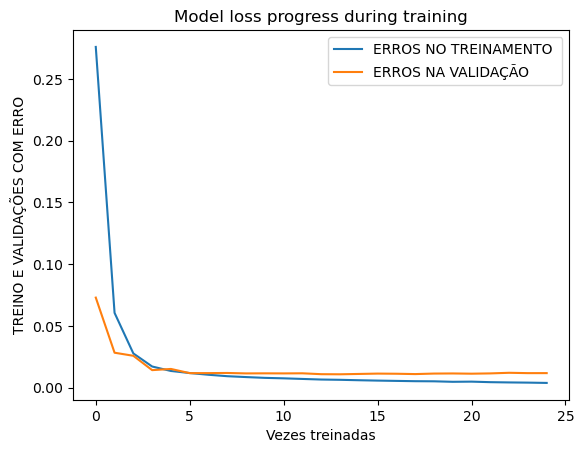

In [146]:
plt.plot(numberTrainning.history['loss'])
plt.plot(numberTrainning.history['val_loss'])
plt.title('Model loss progress during training')
plt.xlabel('Vezes treinadas')
plt.ylabel('TREINO E VALIDAÇÕES COM ERRO')
plt.legend(['ERROS NO TREINAMENTO ', 'ERROS NA VALIDAÇÃO'])

In [147]:
yPredict = model.predict(xTest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [148]:
yPredict

array([[0.4635608 ],
       [0.78716505],
       [0.5344548 ],
       [0.8405414 ],
       [0.70496285],
       [0.6286988 ],
       [0.5418559 ],
       [0.30520195],
       [0.4539141 ],
       [0.5505229 ],
       [0.79604   ],
       [0.8655281 ],
       [0.19463336],
       [0.7009576 ],
       [0.3712973 ],
       [0.85554206],
       [0.43695915],
       [0.53071344],
       [0.8377252 ],
       [0.6754155 ],
       [0.4543096 ],
       [0.8712938 ],
       [0.5402896 ],
       [0.75177586],
       [0.68615377],
       [0.8345279 ],
       [0.73733807],
       [0.421502  ],
       [0.45442086],
       [0.11306626],
       [0.53423816],
       [0.4449836 ],
       [0.5218526 ],
       [0.5598761 ],
       [0.32990608],
       [0.37798336],
       [0.3480675 ],
       [0.87613595],
       [0.51292753],
       [0.7636863 ],
       [0.66387504],
       [0.44584945],
       [0.8804285 ],
       [0.77194095],
       [0.7180624 ],
       [0.51563585],
       [0.19019265],
       [0.642

Text(0, 0.5, 'Valor real')

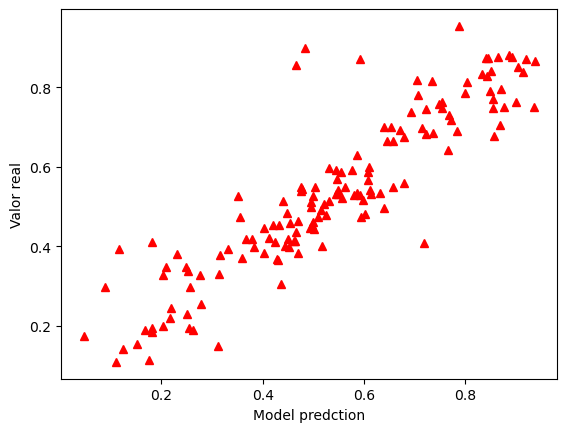

In [152]:
#comparação com os valores normalizados
plt.plot(yTest, yPredict,"^", color='red')
plt.xlabel('Model predction')
plt.ylabel('Valor real')

In [153]:
#tranformando para os valores normais

yPredictOriginal = scaler.inverse_transform(yPredict)

In [154]:
yTestOriginal =  scaler.inverse_transform(yTest)

Text(0, 0.5, 'Valor real')

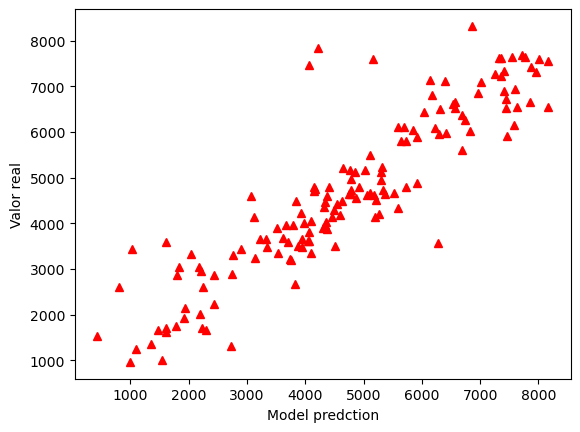

In [156]:
#comparação com os valores normalizados
plt.plot(yTestOriginal, yPredictOriginal,"^", color='red')
plt.xlabel('Model predction')
plt.ylabel('Valor real')

In [159]:
numeroDeVariaveisIndependentes = xTest.shape[1]

In [160]:
numeroDeVariaveisIndependentes

35

In [161]:
numeroDeRegistros = len(xTest)

In [162]:
numeroDeRegistros

147

In [163]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [164]:
from math import sqrt

In [173]:
minbsoluteError = mean_absolute_error(yTestOriginal , yPredictOriginal)

In [174]:
minSquareError = mean_squared_error(yTestOriginal , yPredictOriginal)

In [175]:
desvioPadrao = sqrt(minSquareError)

In [176]:
r2  = r2_score(yTestOriginal , yPredictOriginal)

In [181]:
numeroDeRegistroR2 = 1 - (1 - r2) * (numeroDeRegistros - 1) / (numeroDeRegistros - numeroDeVariaveisIndependentes - 1)

In [178]:
print(minbsoluteError)

570.3606779137436


In [179]:
print(minSquareError)

698737.4787696245


In [180]:
print(r2)

0.8081445530397067


In [182]:
print(numeroDeRegistroR2)

0.747649592286461
